## GSE190389 – Diurnal mRNA expression profiles from 22 tissues – response to time restricted feeding in mammals

- So here is another study on time restricted feending but now in mice and generaly more encompassing
- 22 organs and brain regions
- 2h over a 24h period
- TRF influences gene expression and significantly increases the amount of rhythmic transcripts
- https://pubmed.ncbi.nlm.nih.gov/36599299/

In [5]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import PCA_func as pc
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import normalize

### Step 1: Open Dataset

In [6]:
path = '/Users/maksimsgolubovics/Python_VScode/Studienprojekt/rnaseq_datasets/GSE190389_rnaseq.h5ad'
adata = ad.read_h5ad(path)

#Transform to DataFrame
data_df = pd.DataFrame(data=normalize(adata.X, axis=0)*1000000, columns=adata.var.index, index=adata.obs.index).T

#Look at sampeles features
adata.var[['tissue', 'time', 'diet', 'rep']]
adata.var['rep'].unique()
data_df

/Users/maksimsgolubovics/Python_VScode/.venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Unnamed: 0,Fam175a,Sugp2,Mar-01,Mob3b,Mir145a,1810034E14Rik,Vapa,Grik2,Cacnb2,Crat,...,BB031773,Zfp131,4930483K19Rik,Hbb-bs,Mrpl23,Gphn,Cisd3,Tmem107,Nrn1l,Kcne1
Adrenal_ZT0_ALF_1_1,290.643057,1291.746918,94.728107,566.215732,0.000000,85.040005,4365.028126,123.792413,1056.003105,2839.690308,...,0.0,1288.517551,0.0,3021.611332,36.599496,903.146387,1459.674017,311.095716,7.535190,2.152912
Adrenal_ZT0_ALF_2_1,457.254057,1179.234146,139.883642,1018.292751,0.000000,130.858891,4462.739429,132.363016,1768.851220,3706.164460,...,0.0,1182.242397,0.0,5989.426494,37.603130,1085.978385,1929.792615,338.428167,6.016501,3.008250
Adrenal_ZT0_TRF_1_1,288.633682,936.537137,182.679546,652.774910,0.000000,102.300546,4229.640413,147.361500,1146.009683,3874.024231,...,0.0,1266.578183,0.0,2893.644003,17.050091,988.905274,1758.595093,304.465909,2.435727,0.000000
Adrenal_ZT0_TRF_2_1,342.756995,838.000369,97.159463,704.406107,0.000000,113.352707,4299.306242,137.642573,1269.820205,2769.044698,...,0.0,1491.127871,0.0,1331.894306,32.386488,1233.385406,1414.209963,272.586271,0.000000,5.397748
Adrenal_ZT2_ALF_1_1,453.292154,1109.306633,178.798572,1075.309721,0.000000,137.246791,4165.251240,113.323039,1903.827048,2464.146516,...,0.0,1255.367438,0.0,5447.060720,23.923753,910.361743,1510.973847,372.706882,10.073159,2.518290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stomach_ZT20_TRF_2_1,12.683399,34.615109,5.813224,117.321439,1.056950,13.476111,583.700585,0.792712,13.211874,382.351628,...,0.0,69.758694,0.0,1101.341801,9.512549,99.089054,150.615361,37.257484,0.264237,43.334946
Stomach_ZT22_ALF_1_1,47.662446,87.529633,11.581529,459.920336,1.559052,18.040459,1322.076086,4.677156,53.675933,604.466728,...,0.0,324.282814,0.0,309.805902,2.895382,262.366177,77.507156,26.726606,0.000000,90.870459
Stomach_ZT22_TRF_1_1,51.669340,80.159911,9.979748,343.335523,1.609637,26.880934,1341.954177,6.760474,35.412009,719.346673,...,0.0,268.326450,0.0,1003.286600,5.794692,229.051313,135.370453,32.192735,0.321927,136.497198
Stomach_ZT22_ALF_2_1,62.604055,84.600075,18.612016,406.926360,1.692001,14.382013,1035.081916,10.998010,54.990049,554.553491,...,0.0,254.646225,0.0,94.752084,1.269001,227.997202,89.253079,27.495024,0.000000,90.945080


### Step 2: Prepare The Dataset

In [7]:
data_df_log = np.log10(data_df + 0.1) #Logarithmic transformation

### Step 3: Exploratory Analysis

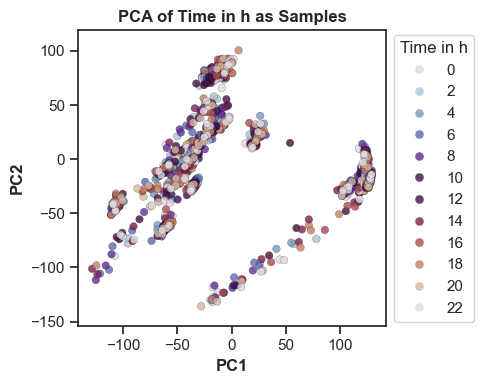

In [15]:
data_df_log_time = data_df_log.join(adata.var['time']).reset_index().set_index('time').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Time in h', c_map='twilight')

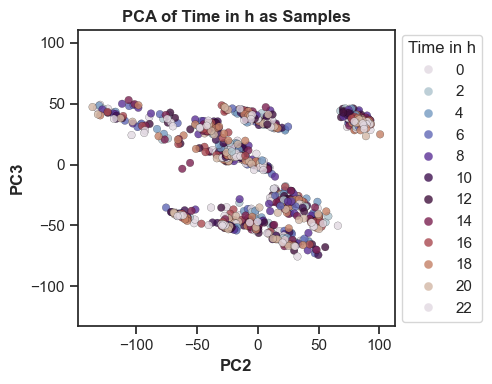

In [16]:
pc.principal_component_2d_timesample(data=data_df_log_time, x=2, y=3, label='Time in h', c_map='twilight')

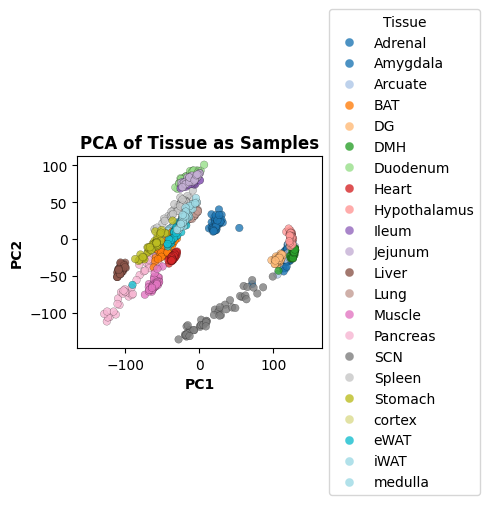

In [9]:
data_df_log_subject = data_df_log.join(adata.var['tissue']).reset_index().set_index('tissue').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_subject, label='Tissue', c_map='tab20')

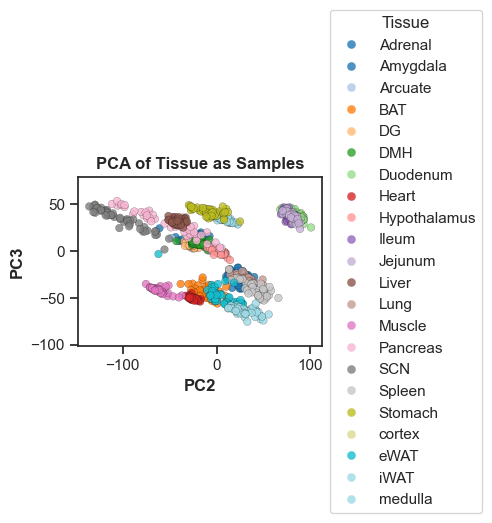

In [17]:
data_df_log_subject = data_df_log.join(adata.var['tissue']).reset_index().set_index('tissue').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_subject, x=2, y=3, label='Tissue', c_map='tab20')

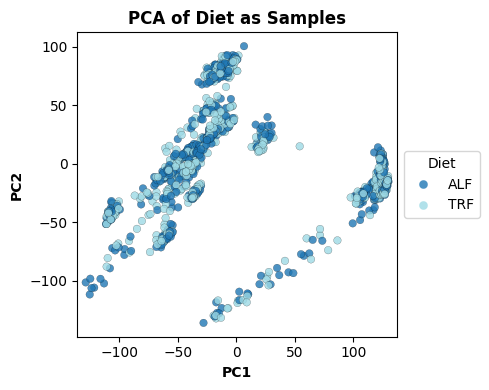

In [10]:
data_df_log_subject = data_df_log.join(adata.var['diet']).reset_index().set_index('diet').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_subject, label='Diet', c_map='tab20')

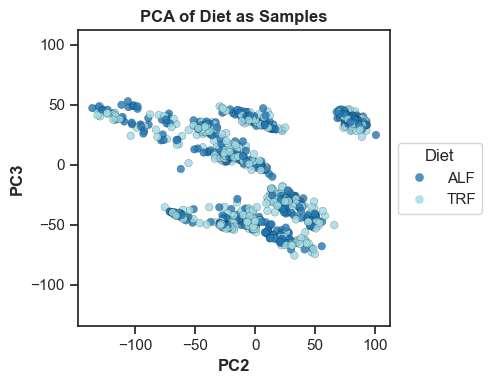

In [18]:
data_df_log_subject = data_df_log.join(adata.var['diet']).reset_index().set_index('diet').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_subject, x=2, y=3, label='Diet', c_map='tab20')

##### In this dataset, I will analyze each organ individually to see how COFE performs in each organ compared to the others.

## COFE: Adrenal

### Identify Mean and Std Threshold valuse

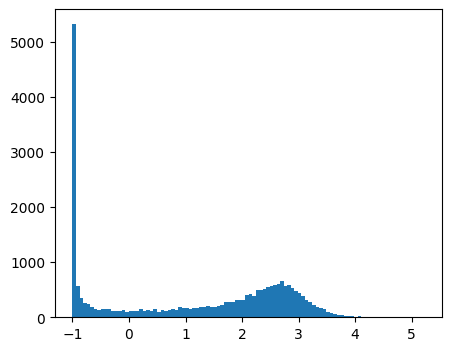

In [25]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log[adata.var['tissue'] == 'Adrenal'].mean(), bins=100);

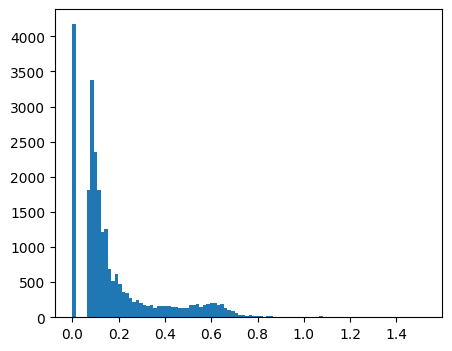

In [26]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log[adata.var['tissue'] == 'Adrenal'].std(), bins=100);

### COFE: Adrenal All Samples

In [25]:
X_train_a = data_df_log[adata.var['tissue'] == 'Adrenal']
true_time_train_a = adata.var[adata.var['tissue'] == 'Adrenal']['time'].astype(int)

X_train_a, X_test_a, features_a, features_std_a = COFE.analyse.preprocess_data(X_train_a.to_numpy(), None, 
                                                                           features=X_train_a.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=12)
X_train_a.shape # (Samples, Transcripts)

(48, 8591)

In [26]:
s_choices = np.linspace(1, 50, 15)
cv_a = COFE.analyse.cross_validate(X_train_a, s_choices, features=features_a, K=5, ncores=-1)

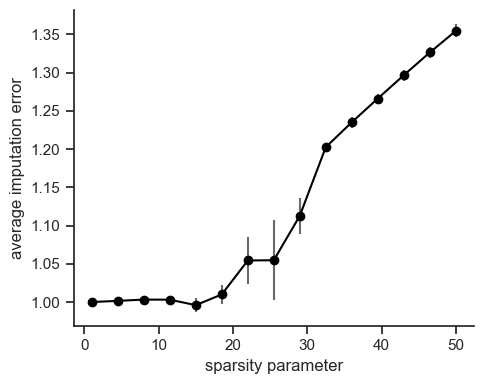

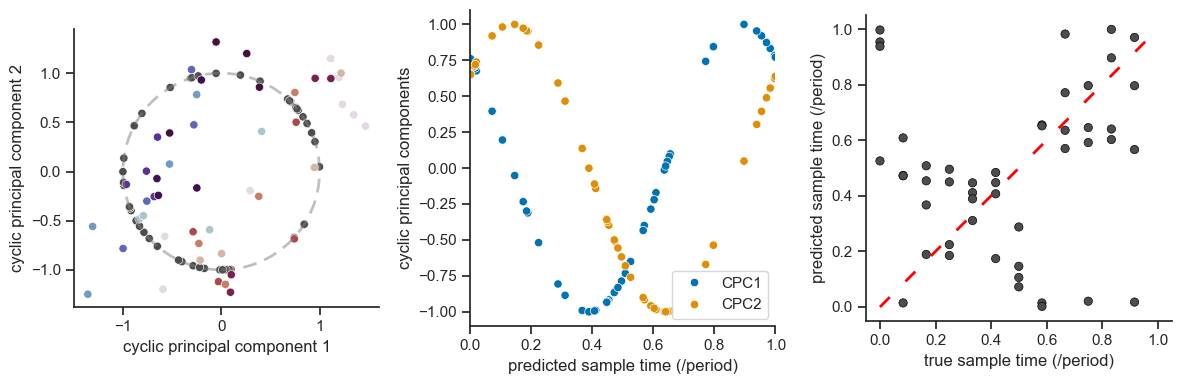

In [27]:
results_train_diet_a = COFE.analyse.predict_time(X_train_a, cv_a, true_times=true_time_train_a.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_a, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_a, time=true_time_train_a.to_numpy(), X=X_train_a, figsize=(12, 4), period=24)

In [28]:
results_train_diet_a["MAPE"]*24

np.float64(2.803087772451403)

### COFE: Adrenal TRF

In [29]:
X_train_b = data_df_log[(adata.var['tissue'] == 'Adrenal') & (adata.var['diet'] == 'TRF')]
true_time_train_b = adata.var[(adata.var['tissue'] == 'Adrenal') & (adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_b, X_test_b, features_b, features_std_b = COFE.analyse.preprocess_data(X_train_b.to_numpy(), None, 
                                                                           features=X_train_b.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=13)
X_train_b.shape # (Samples, Transcripts)

(24, 8970)

In [30]:
s_choices = np.linspace(1, 50, 15)
cv_b = COFE.analyse.cross_validate(X_train_b, s_choices, features=features_b, K=5, ncores=-1)

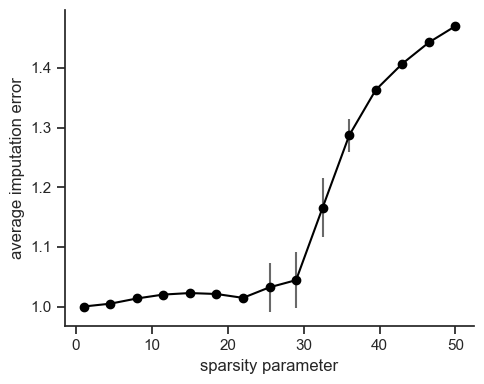

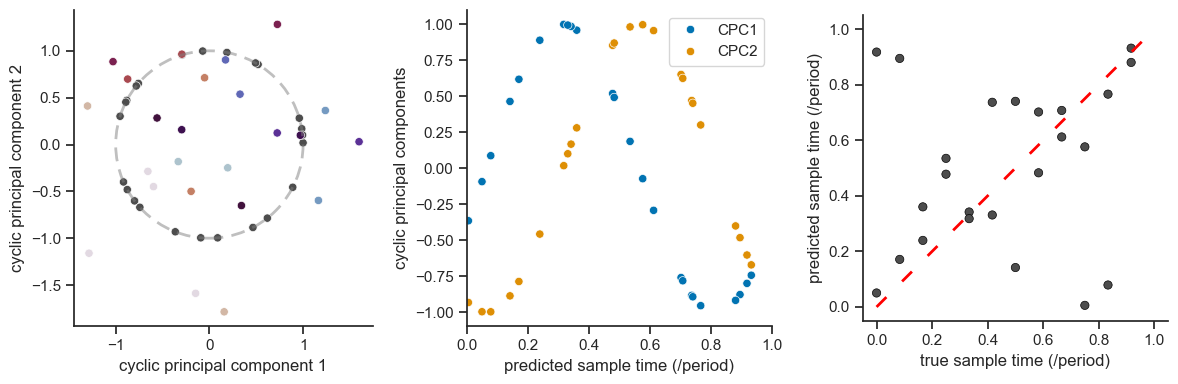

In [31]:
results_train_diet_b = COFE.analyse.predict_time(X_train_b, cv_b, true_times=true_time_train_b.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_b, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_b, time=true_time_train_b.to_numpy(), X=X_train_b, figsize=(12, 4), period=24)

In [32]:
results_train_diet_b["MAPE"]*24

np.float64(2.2575864657846294)

### COFE: Adrenal ALF

In [245]:
X_train_c = data_df_log[(adata.var['tissue'] == 'Adrenal') & (adata.var['diet'] == 'ALF')]
true_time_train_c = adata.var[(adata.var['tissue'] == 'Adrenal') & (adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_c, X_test_c, features_c, features_std_c = COFE.analyse.preprocess_data(X_train_c.to_numpy(), None, 
                                                                           features=X_train_c.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=11.2)
X_train_c.shape # (Samples, Transcripts)

(24, 9699)

In [246]:
s_choices = np.linspace(1, 50, 15)
cv_c = COFE.analyse.cross_validate(X_train_c, s_choices, features=features_c, K=5, ncores=-1)

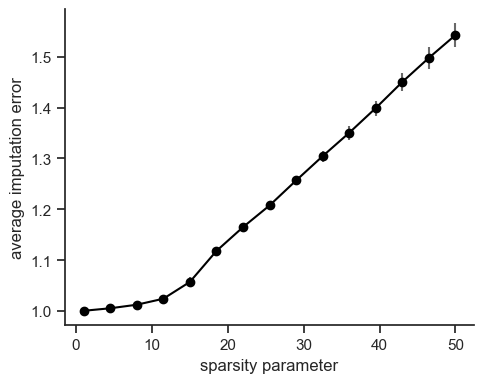

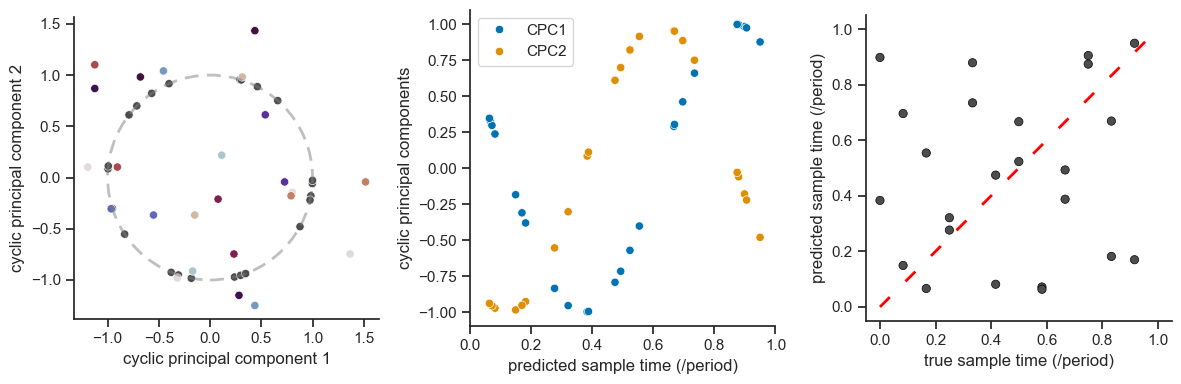

In [248]:
results_train_diet_c = COFE.analyse.predict_time(X_train_c, cv_c, true_times=true_time_train_c.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_c, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_c, time=true_time_train_c.to_numpy(), X=X_train_c, figsize=(12, 4), period=24)

In [249]:
results_train_diet_c["MAPE"]*24

np.float64(4.086306354361)

## COFE: Amygdala

### COFE: Amygdala All Samples

In [34]:
X_train_d = data_df_log[(adata.var['tissue'] == 'Amygdala')]
true_time_train_d = adata.var[(adata.var['tissue'] == 'Amygdala')]['time'].astype(int)

X_train_d, X_test_d, features_d, features_std_d = COFE.analyse.preprocess_data(X_train_d.to_numpy(), None, 
                                                                           features=X_train_d.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6.4)
X_train_d.shape # (Samples, Transcripts)

(46, 4497)

In [35]:
s_choices = np.linspace(1, 50, 15)
cv_d = COFE.analyse.cross_validate(X_train_d, s_choices, features=features_d, K=5, ncores=-1)

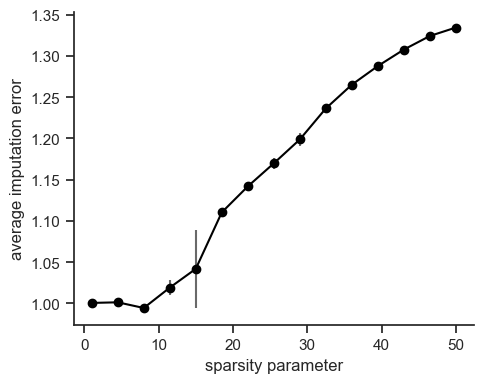

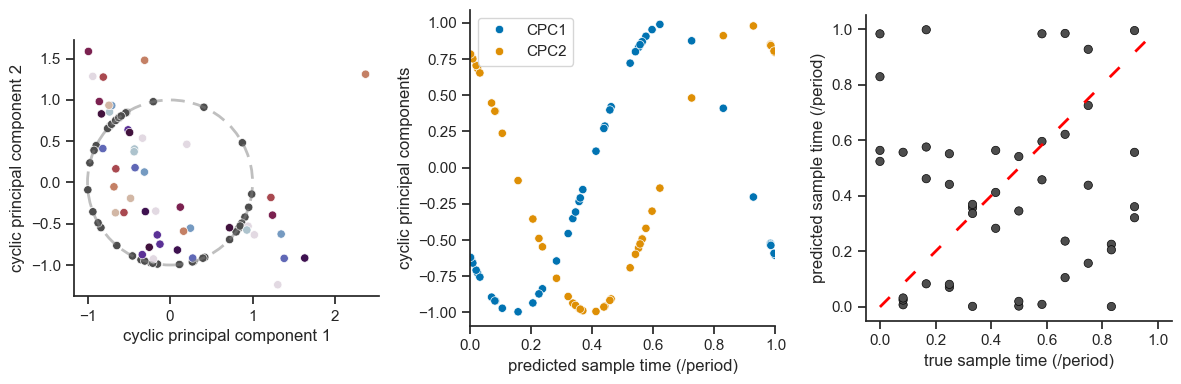

In [39]:
results_train_diet_d = COFE.analyse.predict_time(X_train_d, cv_d, true_times=true_time_train_d.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_d, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_d, time=true_time_train_d.to_numpy(), X=X_train_d, figsize=(12, 4), period=24)

In [40]:
results_train_diet_d["MAPE"]*24

np.float64(4.283793619494235)

### COFE: Amygdala TRF

In [46]:
X_train_e = data_df_log[(adata.var['tissue'] == 'Amygdala') & (adata.var['diet'] == 'TRF')]
true_time_train_e = adata.var[(adata.var['tissue'] == 'Amygdala') & (adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_e, X_test_e, features_e, features_std_e = COFE.analyse.preprocess_data(X_train_e.to_numpy(), None, 
                                                                           features=X_train_e.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_e.shape # (Samples, Transcripts)

(23, 4697)

In [48]:
s_choices = np.linspace(1, 50, 15)
cv_e = COFE.analyse.cross_validate(X_train_e, s_choices, features=features_e, K=5, ncores=-1)

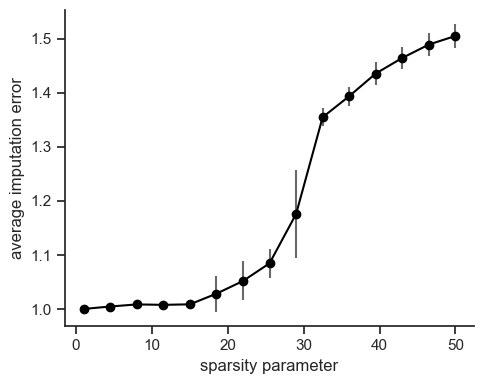

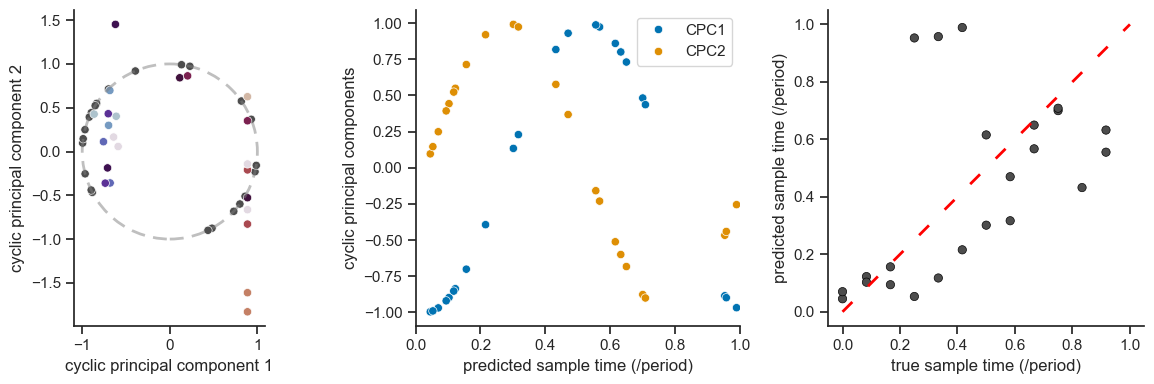

In [50]:
results_train_diet_e = COFE.analyse.predict_time(X_train_e, cv_e, true_times=true_time_train_e.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_e, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_e, time=true_time_train_e.to_numpy(), X=X_train_e, figsize=(12, 4), period=24)

In [51]:
results_train_diet_e["MAPE"]*24

np.float64(2.769848863134797)

### COFE: Amygdala ALF

In [58]:
X_train_f = data_df_log[(adata.var['tissue'] == 'Amygdala') & (adata.var['diet'] == 'ALF')]
true_time_train_f = adata.var[(adata.var['tissue'] == 'Amygdala') & (adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_f, X_test_f, features_f, features_std_f = COFE.analyse.preprocess_data(X_train_f.to_numpy(), None, 
                                                                           features=X_train_f.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_f.shape # (Samples, Transcripts)

(23, 3500)

In [59]:
s_choices = np.linspace(1, 50, 15)
cv_f = COFE.analyse.cross_validate(X_train_f, s_choices, features=features_f, K=5, ncores=-1)

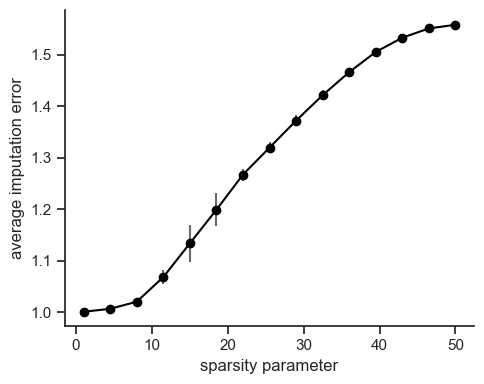

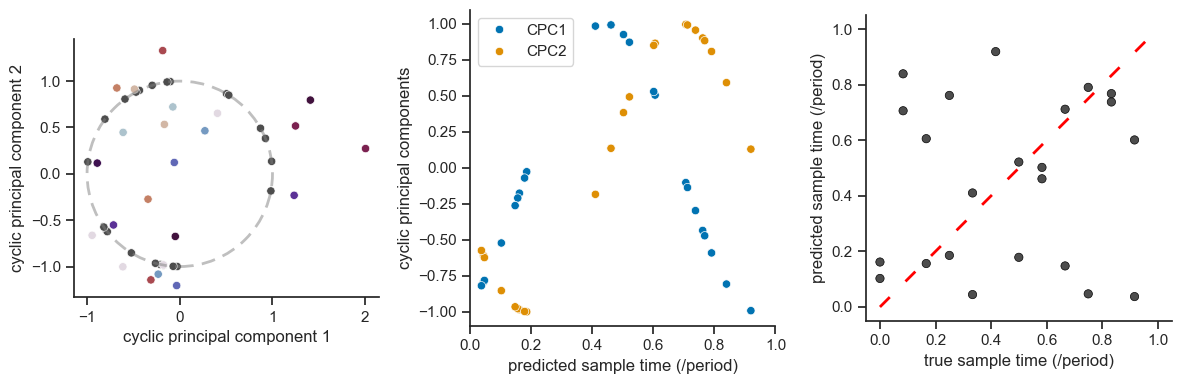

In [62]:
results_train_diet_f = COFE.analyse.predict_time(X_train_f, cv_f, true_times=true_time_train_f.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_f, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_f, time=true_time_train_f.to_numpy(), X=X_train_f, figsize=(12, 4), period=24)

In [61]:
results_train_diet_f["MAPE"]*24

np.float64(2.923786291013232)

## COFE: Arcuate

### COFE: Arcuate All Samples

In [63]:
X_train_g = data_df_log[(adata.var['tissue'] == 'Arcuate')]
true_time_train_g = adata.var[(adata.var['tissue'] == 'Arcuate')]['time'].astype(int)

X_train_g, X_test_g, features_g, features_std_g = COFE.analyse.preprocess_data(X_train_g.to_numpy(), None, 
                                                                           features=X_train_g.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=10)
X_train_g.shape # (Samples, Transcripts)

(46, 6240)

In [64]:
s_choices = np.linspace(1, 50, 15)
cv_g = COFE.analyse.cross_validate(X_train_g, s_choices, features=features_g, K=5, ncores=-1)

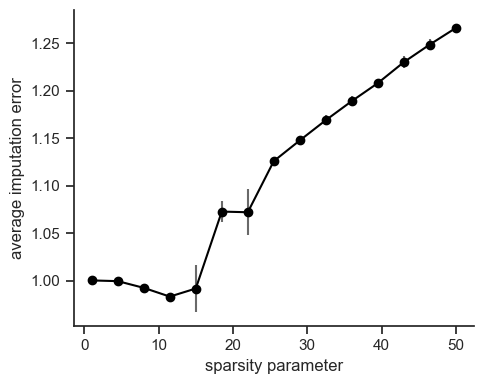

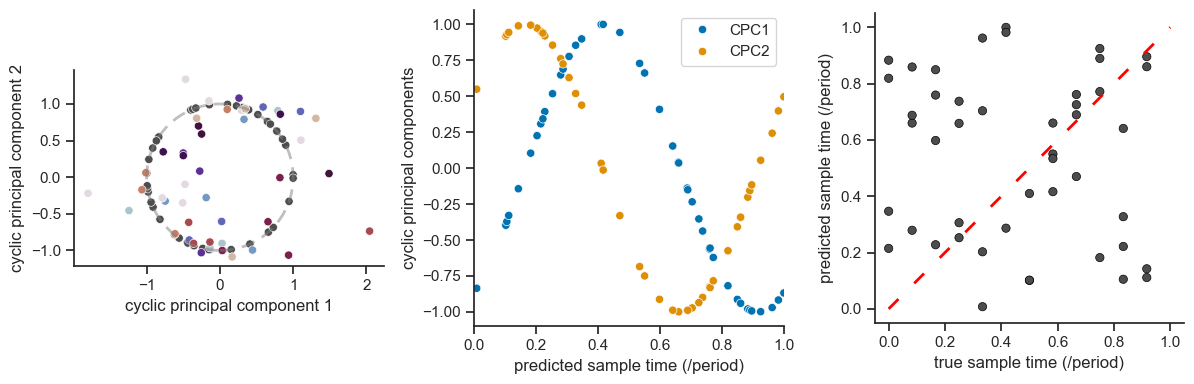

In [65]:
results_train_diet_g = COFE.analyse.predict_time(X_train_g, cv_g, true_times=true_time_train_g.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_g, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_g, time=true_time_train_g.to_numpy(), X=X_train_g, figsize=(12, 4), period=24)

In [66]:
results_train_diet_g["MAPE"]*24

np.float64(4.709283969104245)

### COFE: Arcuate TRF

In [67]:
X_train_k = data_df_log[(adata.var['tissue'] == 'Arcuate') & (adata.var['diet'] == 'TRF')]
true_time_train_k = adata.var[(adata.var['tissue'] == 'Arcuate') & (adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_k, X_test_k, features_k, features_std_k = COFE.analyse.preprocess_data(X_train_k.to_numpy(), None, 
                                                                           features=X_train_k.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=10)
X_train_k.shape # (Samples, Transcripts)

(23, 5797)

In [68]:
s_choices = np.linspace(1, 50, 15)
cv_k = COFE.analyse.cross_validate(X_train_k, s_choices, features=features_k, K=5, ncores=-1)

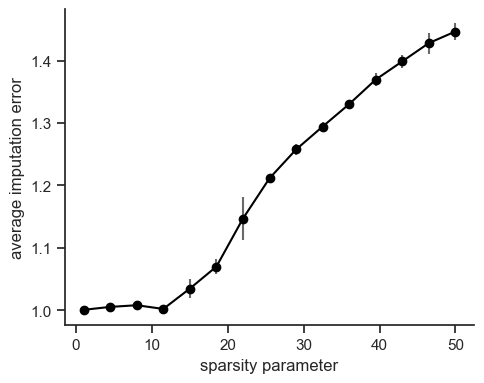

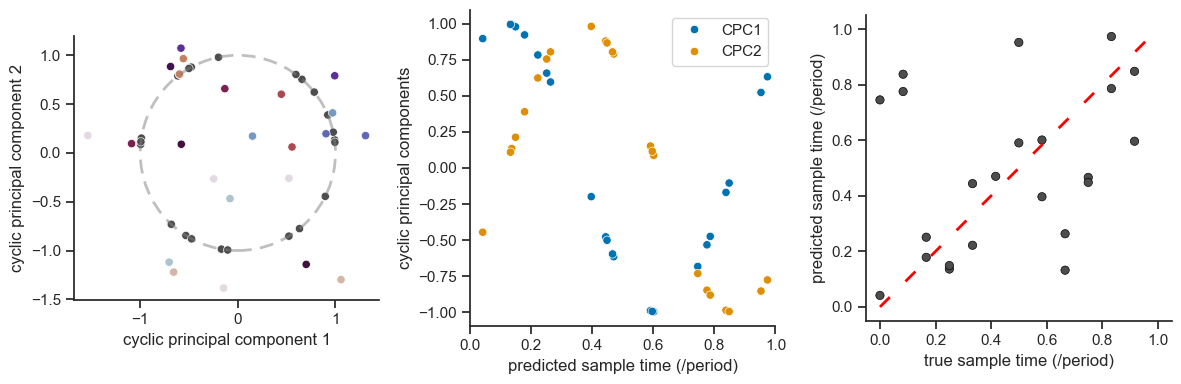

In [69]:
results_train_diet_k = COFE.analyse.predict_time(X_train_k, cv_k, true_times=true_time_train_k.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_k, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_k, time=true_time_train_k.to_numpy(), X=X_train_k, figsize=(12, 4), period=24)

In [70]:
results_train_diet_k["MAPE"]*24

np.float64(2.725676621571944)

### COFE: Arcuate ALF

In [71]:
X_train_l = data_df_log[(adata.var['tissue'] == 'Arcuate') & (adata.var['diet'] == 'ALF')]
true_time_train_l = adata.var[(adata.var['tissue'] == 'Arcuate') & (adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_l, X_test_l, features_l, features_std_l = COFE.analyse.preprocess_data(X_train_l.to_numpy(), None, 
                                                                           features=X_train_l.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=11)
X_train_l.shape # (Samples, Transcripts)

(23, 7138)

In [72]:
s_choices = np.linspace(1, 50, 15)
cv_l = COFE.analyse.cross_validate(X_train_l, s_choices, features=features_l, K=5, ncores=-1)

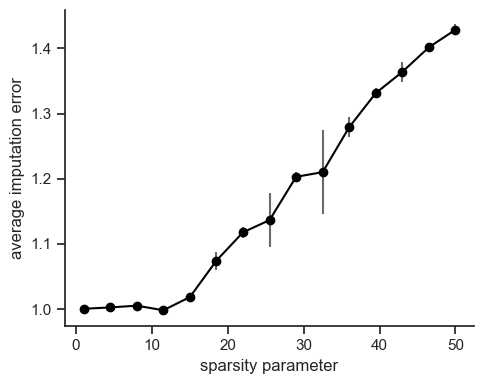

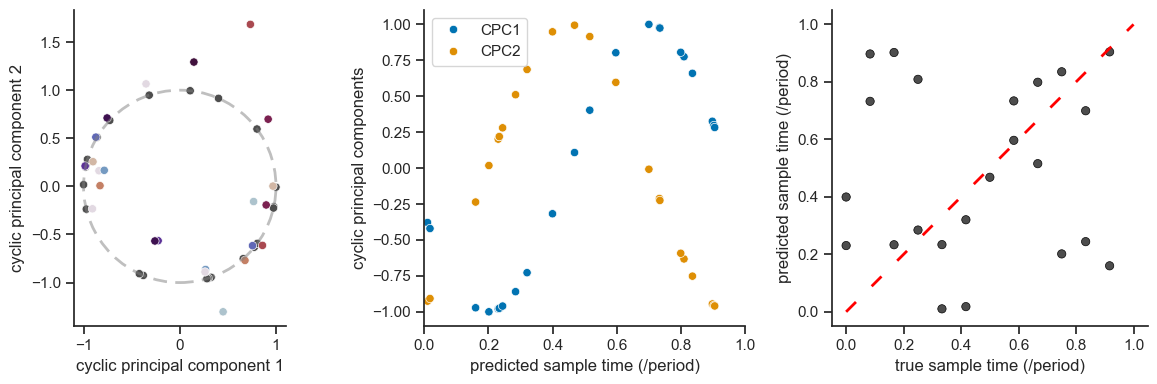

In [73]:
results_train_diet_l = COFE.analyse.predict_time(X_train_l, cv_l, true_times=true_time_train_l.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_l, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_l, time=true_time_train_l.to_numpy(), X=X_train_l, figsize=(12, 4), period=24)

In [74]:
results_train_diet_l["MAPE"]*24

np.float64(3.6298419690322774)

## COFE: BAT

### COFE: BAT All Samples

In [77]:
X_train_m = data_df_log[(adata.var['tissue'] == 'BAT')]
true_time_train_m = adata.var[(adata.var['tissue'] == 'BAT')]['time'].astype(int)

X_train_m, X_test_m, features_m, features_std_m = COFE.analyse.preprocess_data(X_train_m.to_numpy(), None, 
                                                                           features=X_train_m.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_m.shape # (Samples, Transcripts)

(48, 5038)

In [78]:
s_choices = np.linspace(1, 50, 15)
cv_m = COFE.analyse.cross_validate(X_train_m, s_choices, features=features_m, K=5, ncores=-1)

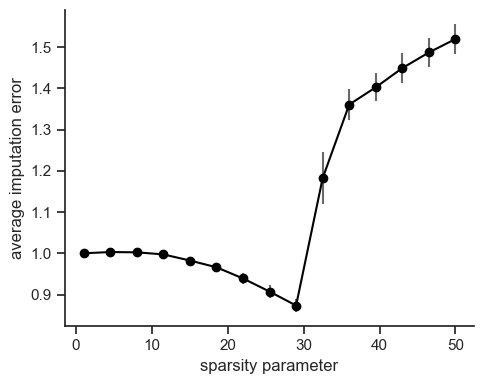

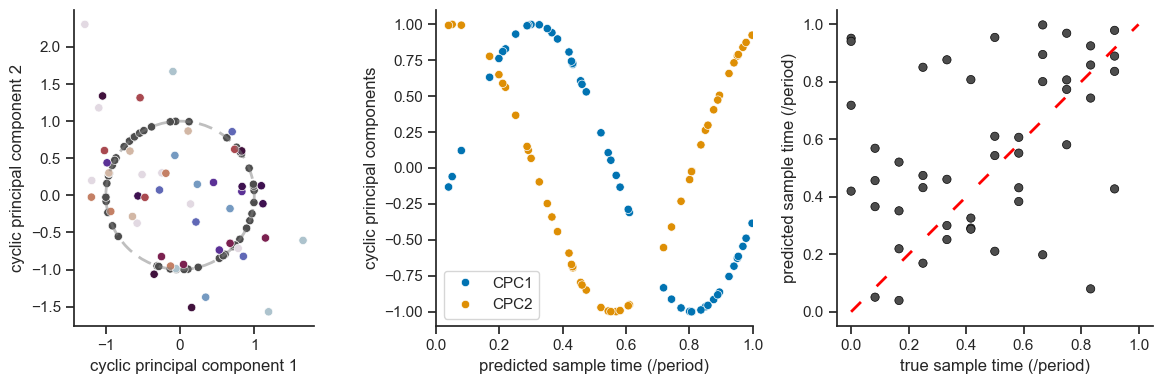

In [79]:
results_train_diet_m = COFE.analyse.predict_time(X_train_m, cv_m, true_times=true_time_train_m.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_m, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_m, time=true_time_train_m.to_numpy(), X=X_train_m, figsize=(12, 4), period=24)

In [80]:
results_train_diet_m["MAPE"]*24

np.float64(3.1617862902282496)

### COFE: BAT TRF

In [83]:
X_train_n = data_df_log[(adata.var['tissue'] == 'BAT') & (adata.var['diet'] == 'TRF')]
true_time_train_n = adata.var[(adata.var['tissue'] == 'BAT') & (adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_n, X_test_n, features_n, features_std_n = COFE.analyse.preprocess_data(X_train_n.to_numpy(), None, 
                                                                           features=X_train_n.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_n.shape # (Samples, Transcripts)

(24, 4792)

In [84]:
s_choices = np.linspace(1, 50, 15)
cv_n = COFE.analyse.cross_validate(X_train_n, s_choices, features=features_n, K=5, ncores=-1)

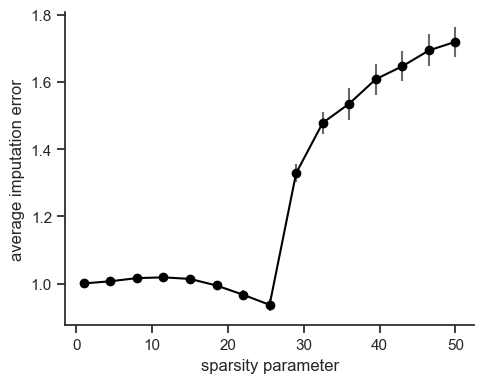

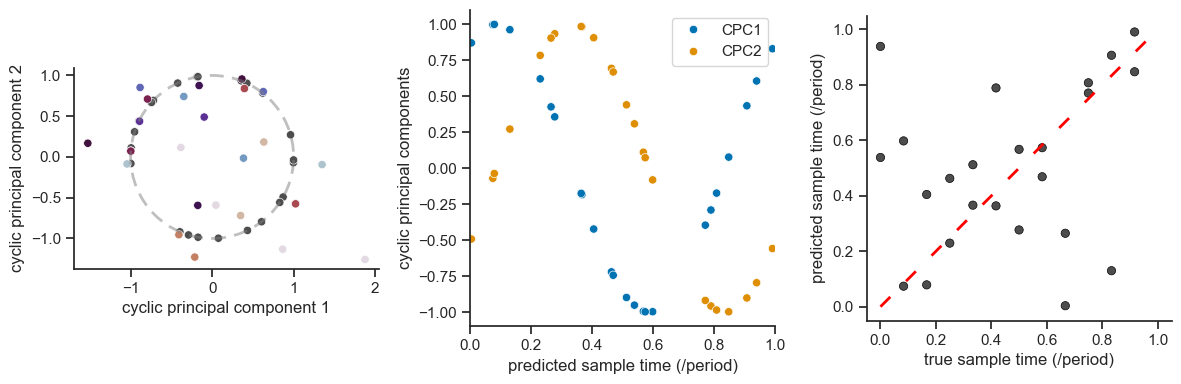

In [85]:
results_train_diet_n = COFE.analyse.predict_time(X_train_n, cv_n, true_times=true_time_train_n.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_n, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_n, time=true_time_train_n.to_numpy(), X=X_train_n, figsize=(12, 4), period=24)

In [86]:
results_train_diet_n["MAPE"]*24

np.float64(1.9465049975517172)

### COFE: BAT ALF

In [89]:
X_train_p = data_df_log[(adata.var['tissue'] == 'BAT') & (adata.var['diet'] == 'ALF')]
true_time_train_p = adata.var[(adata.var['tissue'] == 'BAT') & (adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_p, X_test_p, features_p, features_std_p = COFE.analyse.preprocess_data(X_train_p.to_numpy(), None, 
                                                                           features=X_train_p.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_p.shape # (Samples, Transcripts)

(24, 4996)

In [90]:
s_choices = np.linspace(1, 50, 15)
cv_p = COFE.analyse.cross_validate(X_train_p, s_choices, features=features_p, K=5, ncores=-1)

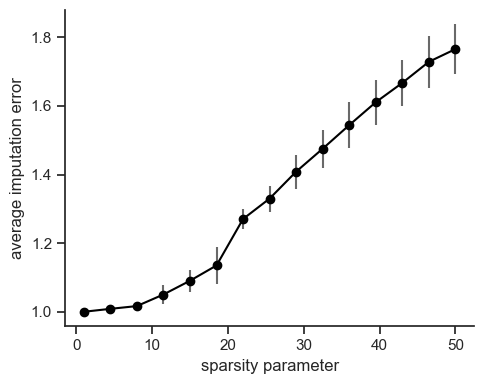

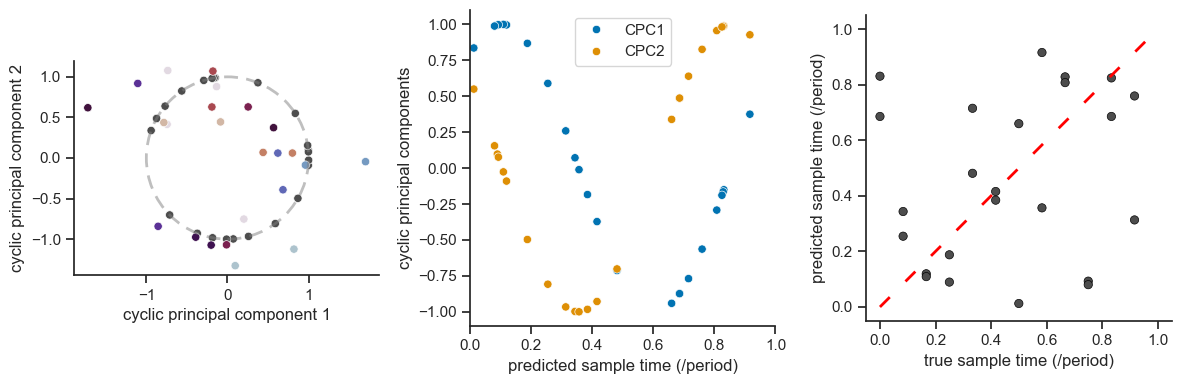

In [91]:
results_train_diet_p = COFE.analyse.predict_time(X_train_p, cv_p, true_times=true_time_train_p.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_p, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_p, time=true_time_train_p.to_numpy(), X=X_train_p, figsize=(12, 4), period=24)

In [92]:
results_train_diet_p["MAPE"]*24

np.float64(3.8683153026428565)

## COFE: Lung

### COFE: Lung All Samples

In [96]:
X_train_1 = data_df_log[(adata.var['tissue'] == 'Lung')]
true_time_train_1 = adata.var[(adata.var['tissue'] == 'Lung')]['time'].astype(int)

X_train_1, X_test_1, features_1, features_std_1 = COFE.analyse.preprocess_data(X_train_1.to_numpy(), None, 
                                                                           features=X_train_1.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_1.shape # (Samples, Transcripts)

(46, 4531)

In [97]:
s_choices = np.linspace(1, 50, 15)
cv_1 = COFE.analyse.cross_validate(X_train_1, s_choices, features=features_1, K=5, ncores=-1)

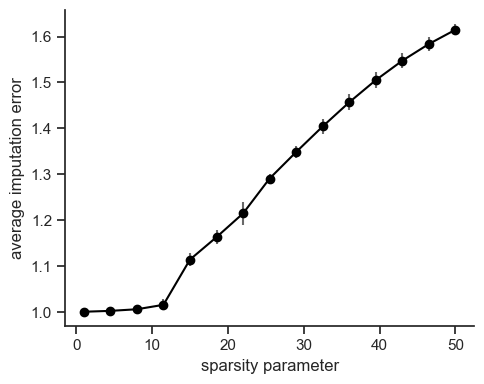

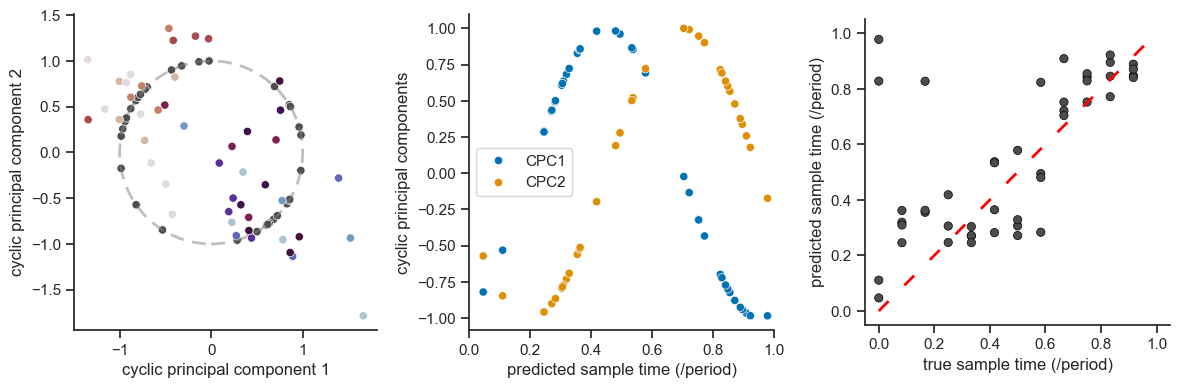

In [98]:
results_train_diet_1 = COFE.analyse.predict_time(X_train_1, cv_1, true_times=true_time_train_1.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_1, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_1, time=true_time_train_1.to_numpy(), X=X_train_1, figsize=(12, 4), period=24)

In [99]:
results_train_diet_1["MAPE"]*24

np.float64(2.119271360840891)

#### COFE: Lung TRF

In [102]:
X_train_2 = data_df_log[(adata.var['tissue'] == 'Lung')& (adata.var['diet'] == 'TRF')]
true_time_train_2 = adata.var[(adata.var['tissue'] == 'Lung')& (adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_2, X_test_2, features_2, features_std_2 = COFE.analyse.preprocess_data(X_train_2.to_numpy(), None, 
                                                                           features=X_train_2.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=7)
X_train_2.shape # (Samples, Transcripts)

(23, 5351)

In [108]:
s_choices = np.linspace(1, 50, 15)
cv_2 = COFE.analyse.cross_validate(X_train_2, s_choices, features=features_2, K=5, ncores=-1, restarts=10)

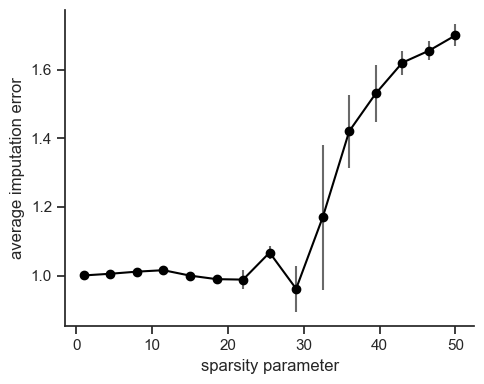

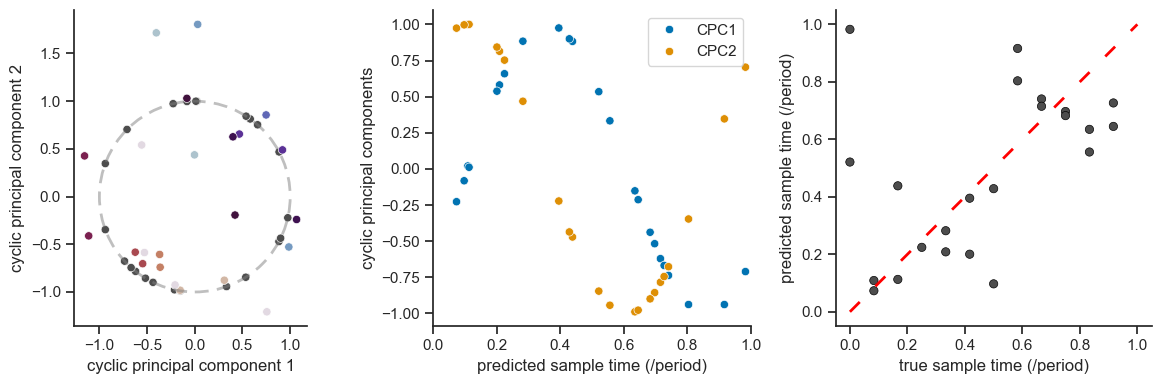

In [109]:
results_train_diet_2 = COFE.analyse.predict_time(X_train_2, cv_2, true_times=true_time_train_2.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_2, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_2, time=true_time_train_2.to_numpy(), X=X_train_2, figsize=(12, 4), period=24)

In [110]:
results_train_diet_2["MAPE"]*24

np.float64(1.7713241853521424)

#### COFE: Lung ALF

In [112]:
X_train_3 = data_df_log[(adata.var['tissue'] == 'Lung')& (adata.var['diet'] == 'ALF')]
true_time_train_3 = adata.var[(adata.var['tissue'] == 'Lung')& (adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_3, X_test_3, features_3, features_std_3 = COFE.analyse.preprocess_data(X_train_3.to_numpy(), None, 
                                                                           features=X_train_3.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=6)
X_train_3.shape # (Samples, Transcripts)

(23, 4936)

In [113]:
s_choices = np.linspace(1, 50, 15)
cv_3 = COFE.analyse.cross_validate(X_train_3, s_choices, features=features_3, K=5, ncores=-1)

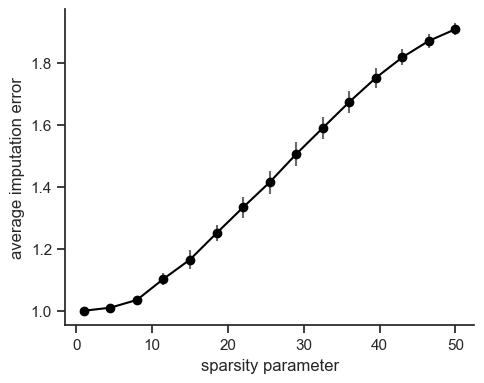

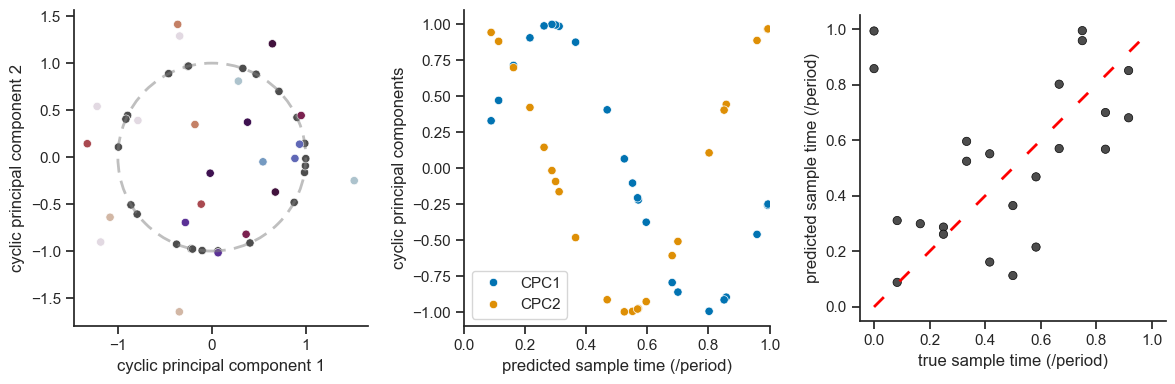

In [114]:
results_train_diet_3 = COFE.analyse.predict_time(X_train_3, cv_3, true_times=true_time_train_3.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_3, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_3, time=true_time_train_3.to_numpy(), X=X_train_3, figsize=(12, 4), period=24)

In [115]:
results_train_diet_3["MAPE"]*24

np.float64(3.2491050524973204)

## COFE: Muscle

### COFE: Muscle All Samples

In [120]:
X_train_4 = data_df_log[(adata.var['tissue'] == 'Muscle')]
true_time_train_4 = adata.var[(adata.var['tissue'] == 'Muscle')]['time'].astype(int)

X_train_4, X_test_4, features_4, features_std_4 = COFE.analyse.preprocess_data(X_train_4.to_numpy(), None, 
                                                                           features=X_train_4.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=9)
X_train_4.shape # (Samples, Transcripts)

(48, 3974)

In [121]:
s_choices = np.linspace(1, 50, 15)
cv_4 = COFE.analyse.cross_validate(X_train_4, s_choices, features=features_4, K=5, ncores=-1)

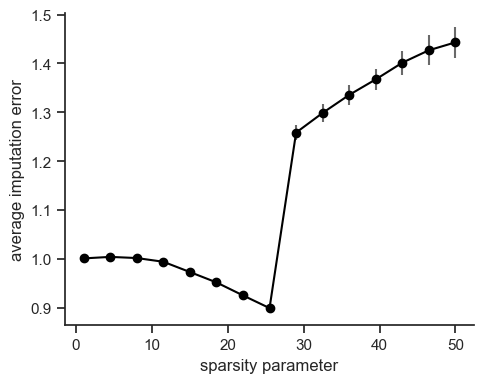

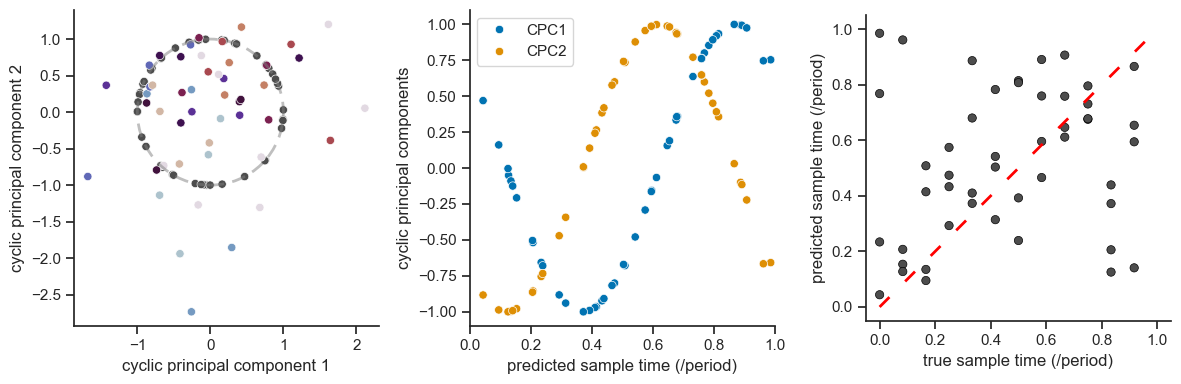

In [122]:
results_train_diet_4 = COFE.analyse.predict_time(X_train_4, cv_4, true_times=true_time_train_4.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_4, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_4, time=true_time_train_4.to_numpy(), X=X_train_4, figsize=(12, 4), period=24)

In [123]:
results_train_diet_4["MAPE"]*24

np.float64(2.9903552807008866)

### COFE: Muscle TRF

In [127]:
X_train_5 = data_df_log[(adata.var['tissue'] == 'Muscle')& (adata.var['diet'] == 'TRF')]
true_time_train_5 = adata.var[(adata.var['tissue'] == 'Muscle')&(adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_5, X_test_5, features_5, features_std_5 = COFE.analyse.preprocess_data(X_train_5.to_numpy(), None, 
                                                                           features=X_train_5.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=10)
X_train_5.shape # (Samples, Transcripts)

(24, 4894)

In [128]:
s_choices = np.linspace(1, 50, 15)
cv_5 = COFE.analyse.cross_validate(X_train_5, s_choices, features=features_5, K=5, ncores=-1)

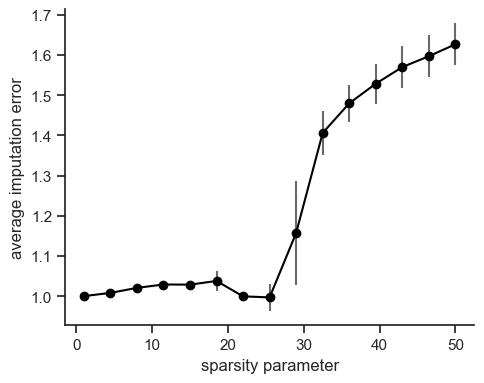

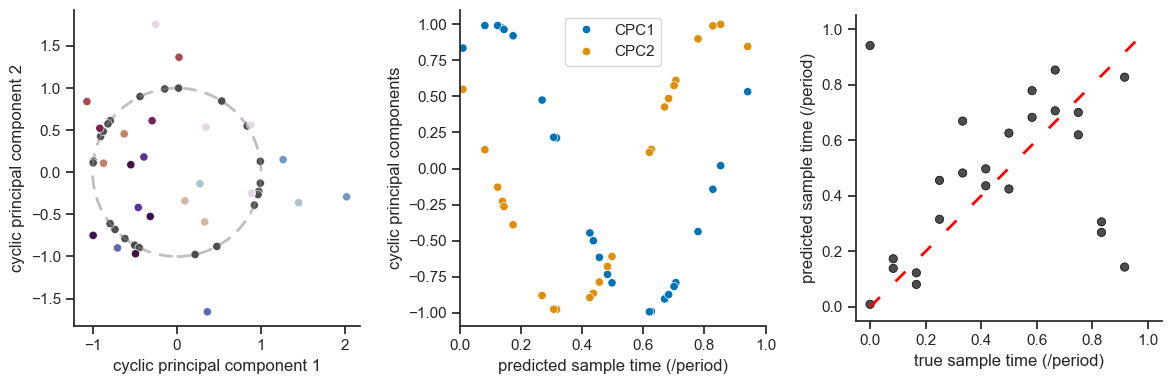

In [129]:
results_train_diet_5 = COFE.analyse.predict_time(X_train_5, cv_5, true_times=true_time_train_5.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_5, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_5, time=true_time_train_5.to_numpy(), X=X_train_5, figsize=(12, 4), period=24)

In [130]:
results_train_diet_5["MAPE"]*24

np.float64(2.152435409442365)

### COFE: Muscle ALF

In [133]:
X_train_6 = data_df_log[(adata.var['tissue'] == 'Muscle')& (adata.var['diet'] == 'ALF')]
true_time_train_6 = adata.var[(adata.var['tissue'] == 'Muscle')&(adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_6, X_test_6, features_6, features_std_6 = COFE.analyse.preprocess_data(X_train_6.to_numpy(), None, 
                                                                           features=X_train_6.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=12)
X_train_6.shape # (Samples, Transcripts)

(24, 5172)

In [134]:
s_choices = np.linspace(1, 50, 15)
cv_6 = COFE.analyse.cross_validate(X_train_6, s_choices, features=features_6, K=5, ncores=-1)

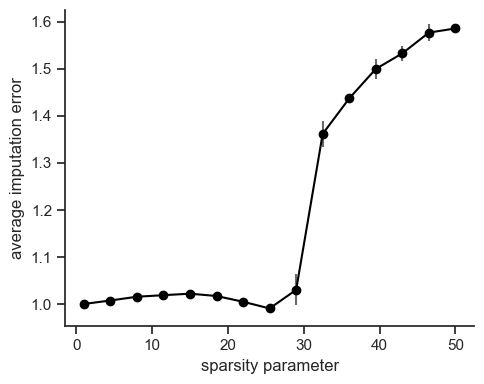

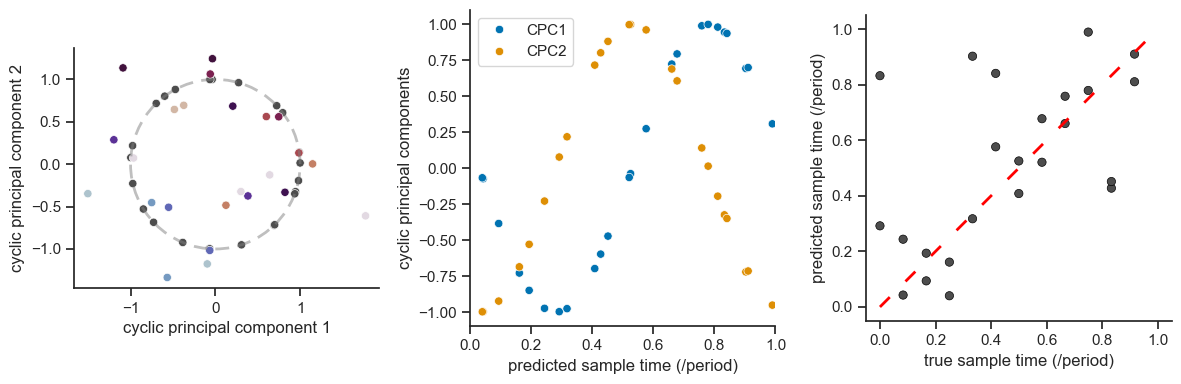

In [135]:
results_train_diet_6 = COFE.analyse.predict_time(X_train_6, cv_6, true_times=true_time_train_6.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_6, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_6, time=true_time_train_6.to_numpy(), X=X_train_6, figsize=(12, 4), period=24)

In [136]:
results_train_diet_6["MAPE"]*24

np.float64(2.237622976443208)

## COFE: Jejunum

### COFE: Jejunum TRF

In [139]:
X_train_7 = data_df_log[(adata.var['tissue'] == 'Jejunum')& (adata.var['diet'] == 'TRF')]
true_time_train_7 = adata.var[(adata.var['tissue'] == 'Jejunum')&(adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_7, X_test_7, features_7, features_std_7 = COFE.analyse.preprocess_data(X_train_7.to_numpy(), None, 
                                                                           features=X_train_7.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=7)
X_train_7.shape # (Samples, Transcripts)

(24, 4953)

In [140]:
s_choices = np.linspace(1, 50, 15)
cv_7 = COFE.analyse.cross_validate(X_train_7, s_choices, features=features_7, K=5, ncores=-1)

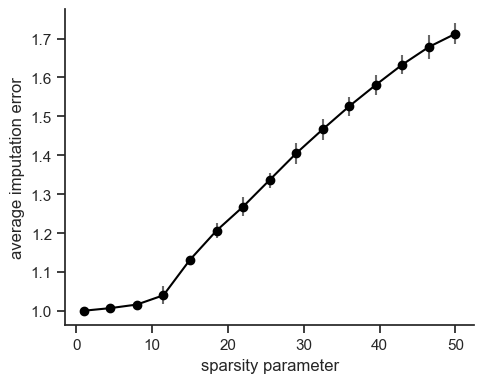

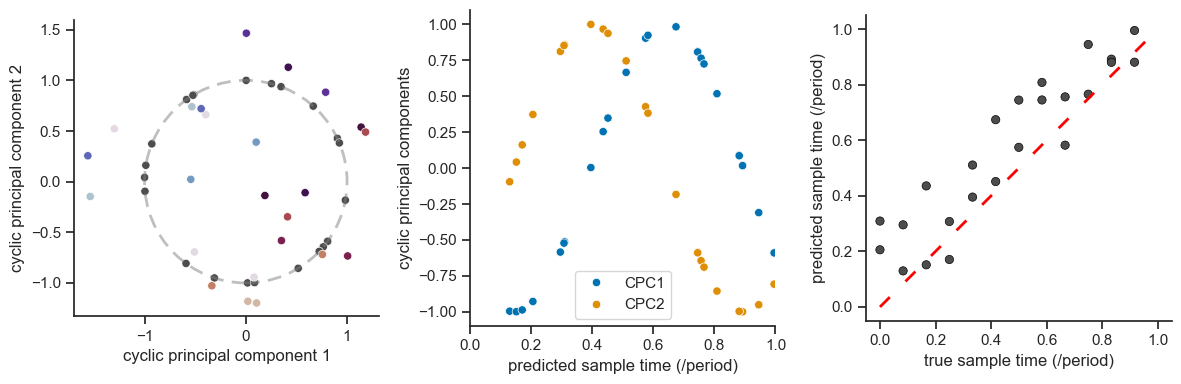

In [141]:
results_train_diet_7 = COFE.analyse.predict_time(X_train_7, cv_7, true_times=true_time_train_7.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_7, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_7, time=true_time_train_7.to_numpy(), X=X_train_7, figsize=(12, 4), period=24)

In [142]:
results_train_diet_7["MAPE"]*24

np.float64(1.9593985439970059)

### COFE: Jejunum ALF

In [145]:
X_train_8 = data_df_log[(adata.var['tissue'] == 'Jejunum')& (adata.var['diet'] == 'ALF')]
true_time_train_8 = adata.var[(adata.var['tissue'] == 'Jejunum')&(adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_8, X_test_8, features_8, features_std_8 = COFE.analyse.preprocess_data(X_train_8.to_numpy(), None, 
                                                                           features=X_train_8.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=8)
X_train_8.shape # (Samples, Transcripts)

(24, 4402)

In [146]:
s_choices = np.linspace(1, 50, 15)
cv_8 = COFE.analyse.cross_validate(X_train_8, s_choices, features=features_8, K=5, ncores=-1)

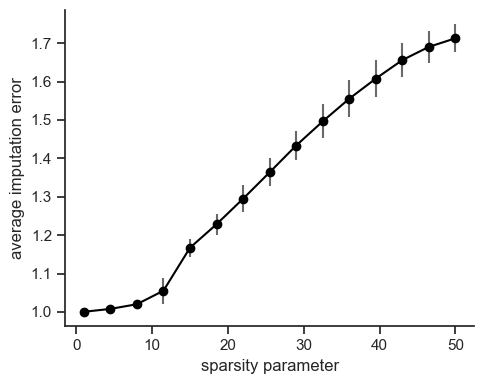

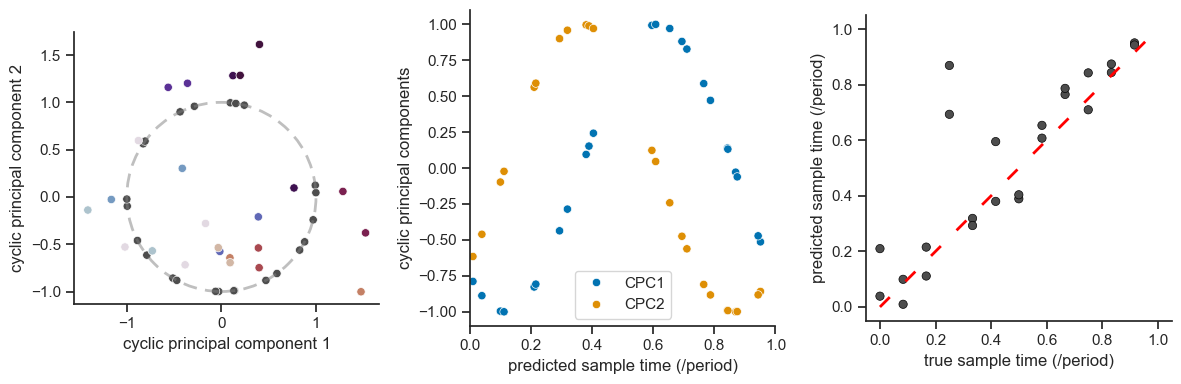

In [147]:
results_train_diet_8 = COFE.analyse.predict_time(X_train_8, cv_8, true_times=true_time_train_8.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_8, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_8, time=true_time_train_8.to_numpy(), X=X_train_8, figsize=(12, 4), period=24)

In [149]:
results_train_diet_8["MAPE"]*24

np.float64(1.249335746514987)

## COFE: Liver 

### COFE: Liver TRF

In [153]:
X_train_9 = data_df_log[(adata.var['tissue'] == 'Liver')& (adata.var['diet'] == 'TRF')]
true_time_train_9 = adata.var[(adata.var['tissue'] == 'Liver')&(adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_9, X_test_9, features_9, features_std_9 = COFE.analyse.preprocess_data(X_train_9.to_numpy(), None, 
                                                                           features=X_train_9.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=9)
X_train_9.shape # (Samples, Transcripts)

(24, 4984)

In [154]:
s_choices = np.linspace(1, 50, 15)
cv_9 = COFE.analyse.cross_validate(X_train_9, s_choices, features=features_9, K=5, ncores=-1)

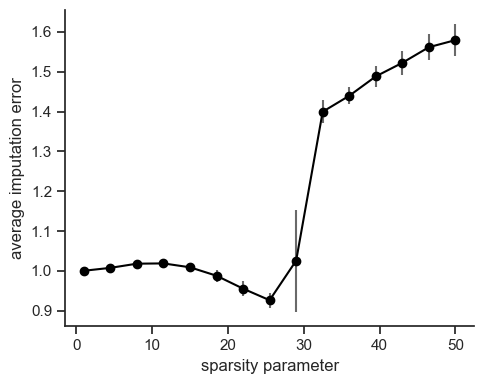

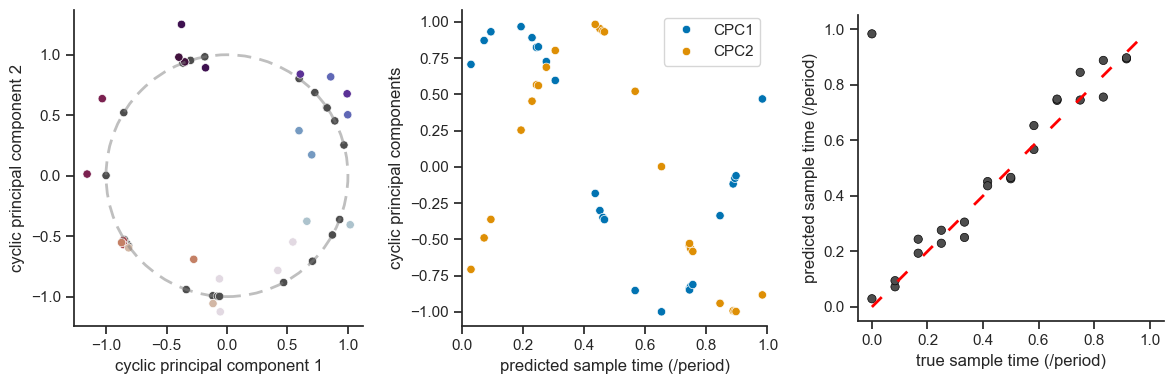

In [155]:
results_train_diet_9 = COFE.analyse.predict_time(X_train_9, cv_9, true_times=true_time_train_9.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_9, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_9, time=true_time_train_9.to_numpy(), X=X_train_9, figsize=(12, 4), period=24)

In [156]:
results_train_diet_9["MAPE"]*24

np.float64(0.6884129439479949)

### COFE: Liver ALF

In [159]:
X_train_10 = data_df_log[(adata.var['tissue'] == 'Liver')& (adata.var['diet'] == 'ALF')]
true_time_train_10 = adata.var[(adata.var['tissue'] == 'Liver')&(adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_10, X_test_10, features_10, features_std_10 = COFE.analyse.preprocess_data(X_train_10.to_numpy(), None, 
                                                                           features=X_train_10.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=10)
X_train_10.shape # (Samples, Transcripts)

(24, 6069)

In [160]:
s_choices = np.linspace(1, 50, 15)
cv_10 = COFE.analyse.cross_validate(X_train_10, s_choices, features=features_10, K=5, ncores=-1)

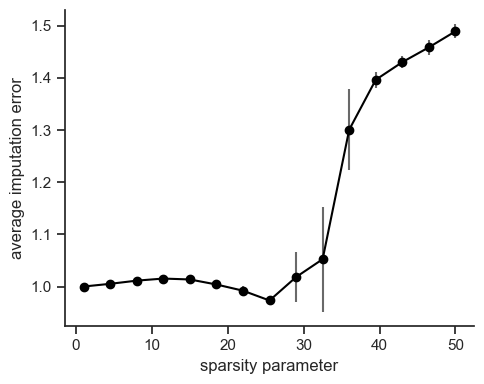

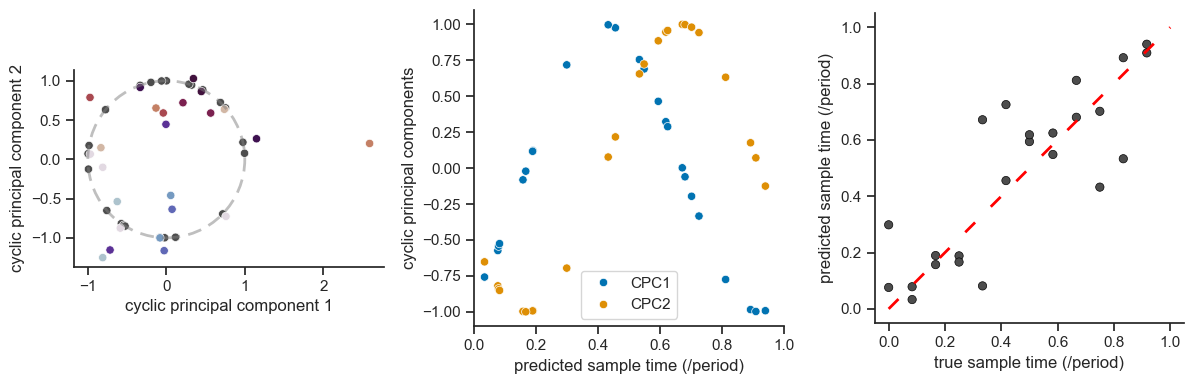

In [161]:
results_train_diet_10 = COFE.analyse.predict_time(X_train_10, cv_10, true_times=true_time_train_10.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_10, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_10, time=true_time_train_10.to_numpy(), X=X_train_10, figsize=(12, 4), period=24)

In [162]:
results_train_diet_10["MAPE"]*24

np.float64(1.444461278045089)

## COFE: Heart

### COFE: Heart TRF

In [166]:
X_train_11 = data_df_log[(adata.var['tissue'] == 'Heart')& (adata.var['diet'] == 'TRF')]
true_time_train_11 = adata.var[(adata.var['tissue'] == 'Heart')&(adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_11, X_test_11, features_11, features_std_11 = COFE.analyse.preprocess_data(X_train_11.to_numpy(), None, 
                                                                           features=X_train_11.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=12)
X_train_11.shape # (Samples, Transcripts)

(24, 4407)

In [170]:
s_choices = np.linspace(1, 50, 15)
cv_11 = COFE.analyse.cross_validate(X_train_11, s_choices, features=features_11, K=5, ncores=-1, restarts=10)

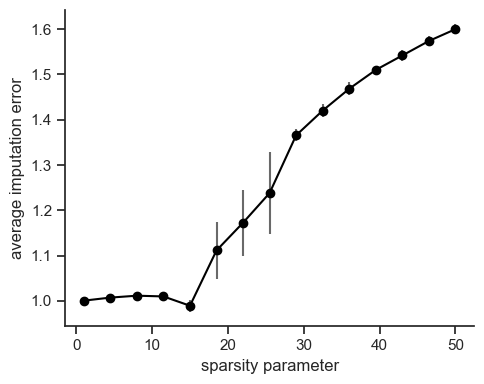

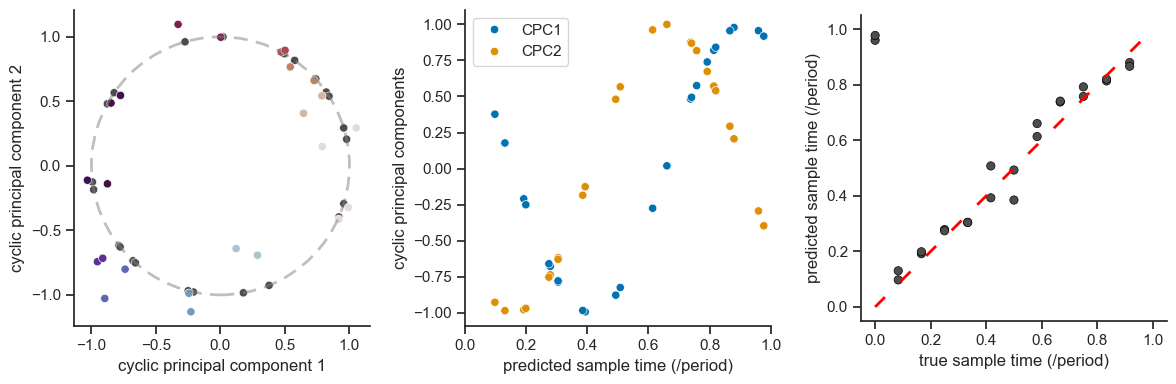

In [171]:
results_train_diet_11 = COFE.analyse.predict_time(X_train_11, cv_11, true_times=true_time_train_11.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_11, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_11, time=true_time_train_11.to_numpy(), X=X_train_11, figsize=(12, 4), period=24)

In [172]:
results_train_diet_11["MAPE"]*24

np.float64(0.715510801840308)

### COFE: Heart ALF

In [176]:
X_train_12 = data_df_log[(adata.var['tissue'] == 'Heart')& (adata.var['diet'] == 'ALF')]
true_time_train_12 = adata.var[(adata.var['tissue'] == 'Heart')&(adata.var['diet'] == 'ALF')]['time'].astype(int)

X_train_12, X_test_12, features_12, features_std_12 = COFE.analyse.preprocess_data(X_train_12.to_numpy(), None, 
                                                                           features=X_train_12.columns, feature_dim='col',
                                                                           mean_threshold=1, scaling_threshold=14)
X_train_12.shape # (Samples, Transcripts)

(24, 4799)

In [177]:
s_choices = np.linspace(1, 50, 15)
cv_12 = COFE.analyse.cross_validate(X_train_12, s_choices, features=features_12, K=5, ncores=-1)

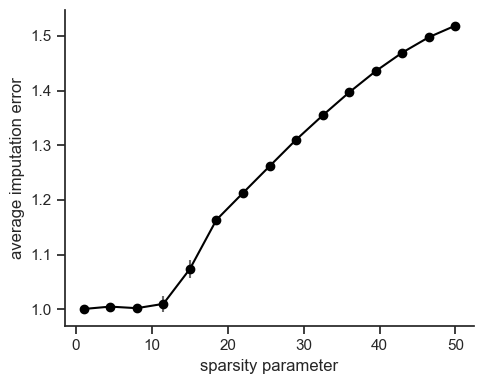

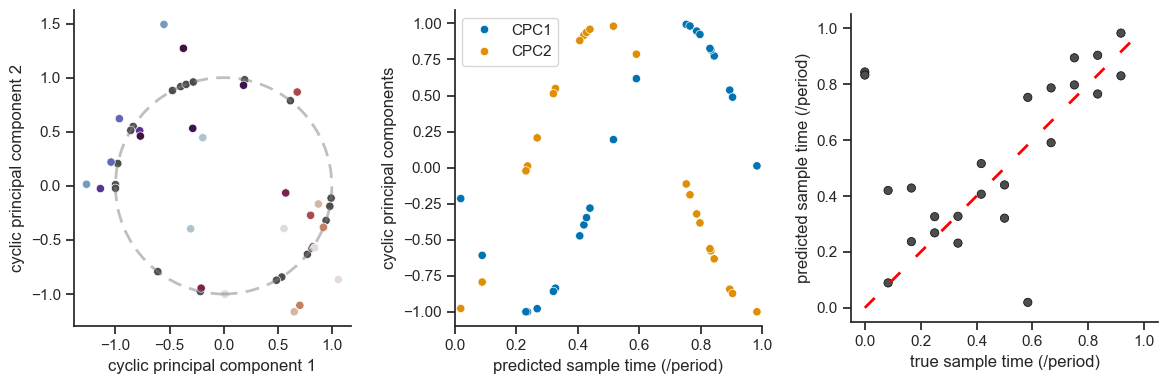

In [178]:
results_train_diet_12 = COFE.analyse.predict_time(X_train_12, cv_12, true_times=true_time_train_12.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_12, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_12, time=true_time_train_12.to_numpy(), X=X_train_12, figsize=(12, 4), period=24)

In [179]:
results_train_diet_12["MAPE"]*24

np.float64(1.9521550485186516)

# Conclusion

So, I only applied COFE to a subset of the tissues/organs, but investigated how COFE predicts time for all samples together and separately for timed restricted and ad libitum feeding groups. As expected, COFE gives a poor prediction when all samples, TRF and ALF togehter, of a given organ are used. The main reason for this is that TRF upregulates a large number of genes and the results are likely to conflict when fewer rhythmic, downregulated genes of ALF are also present in the dataset. However, looking at TRF and ALF samples from each organ in isolation gives an interesting insight into how COFE performs in certain tissue types and how influential factors such as your dietary behavior can be. Below is a brief summary of the MAPE results for specific organs and the number of rhythmic genes identified in these organs (from the paper mentioned in the description).

- Adrenal TRF ->    MAPE: 2.1 -> 2008 genes; ALF ->     MAPE: 4.08 -> 941 genes
- Amygdala TRF ->   MAPE: 2.88 -> 427 genes; ALF ->     MAPE: 3.07 -> 19 genes
- Arcuate TRF ->    MAPE: 2.82 -> 195 genes; ALF ->     MAPE: 3.03 -> 36 genes
- BAT TRF ->        MAPE: 2.16 -> 2996 genes; ALF ->    MAPE: 2.96 -> 617 genes
- Lung TRF ->       MAPE: 1.31 -> 3526 genes; ALF ->    MAPE: 3.00 -> 1617 genes
- Muscle TRF ->     MAPE: 2.35 -> 2162 genes; ALF ->    MAPE: 2.96 -> 902 genes
- Jejunum TRF ->    MAPE: 1.98 -> 4838 genes; ALF ->    MAPE: 2.90 -> 833 genes
- Liver TRF ->      MAPE: 1.90 -> 4174 genes; ALF ->    MAPE: 2.32 -> 1317 genes
- Heart TRF ->      MAPE: 1.77 -> 4218 genes; ALF ->    MAPE: 2.64 -> 2046 genes

Does COFE perform better on TRF samples? It looks that way, but there is a big BUT: The local minimum problem of cross-validation. The found parameters can predict the time series surprisingly well in some cases, while in another, second or third run the MAPE results are very disappointing. Looking at the plot of average imputation error by sparsity parameter it grows to the infinity in many cases, which probably suggest that the prediction will probably be random (if I understand it correctly). Perhaps this is due to the small size of the data set and the fact that 24 samples are not sufficient to make a meaningful prediction. If so, these samples perform quite well even compared to the larger mouse liver data set I analyzed previously.

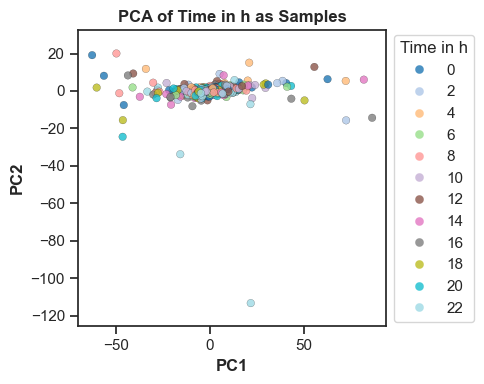

In [180]:
residual_0 = pc.residual_dummy(data=data_df_log.T[data_df_log.mean() > 1].T, data_dummy_1=adata.var['tissue'], columns='tissue')
residual_time = residual_0[adata.var['diet'] == 'TRF'].join(adata.var['time']).reset_index().set_index('time').drop('index', axis=1)
pc.principal_component_2d_timesample(data=residual_time, x=1, y=2, label='Time in h', c_map='tab20')

/Users/maksimsgolubovics/Python_VScode/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


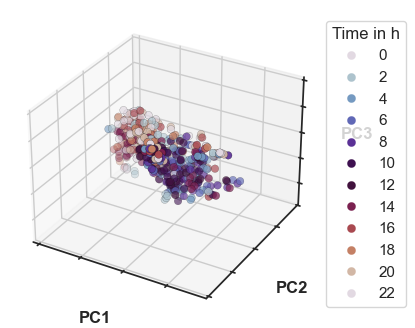

In [181]:

pc.visualization_of_dec_tools_3d(dec=UMAP(n_components=3), data=residual_time, label='Time in h', c_map='twilight')
plt.show()

In [182]:
X_train_13 = residual_0[adata.var['diet'] == 'TRF']
true_time_train_13 = adata.var[(adata.var['diet'] == 'TRF')]['time'].astype(int)

X_train_13, X_test_13, features_13, features_std_13 = COFE.analyse.preprocess_data(X_train_13.to_numpy(), None, 
                                                                           features=X_train_13.columns, feature_dim='col',
                                                                           mean_threshold=-1, scaling_threshold=4)
X_train_13.shape # (Samples, Transcripts)

(518, 4535)

In [183]:
s_choices = np.linspace(1, 50, 15)
cv_13 = COFE.analyse.cross_validate(X_train_13, s_choices, features=features_13, K=5, ncores=-1)

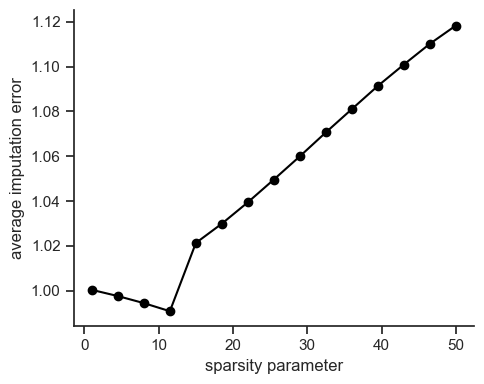

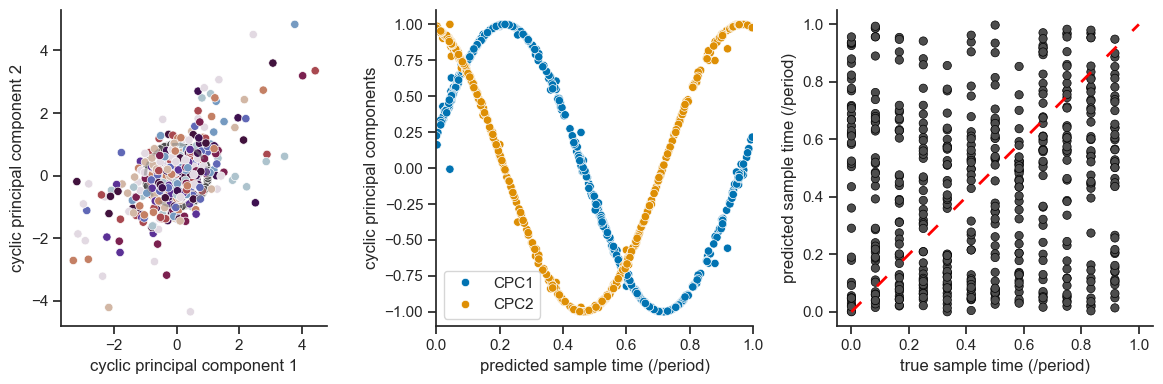

In [184]:
results_train_diet_13 = COFE.analyse.predict_time(X_train_13, cv_13, true_times=true_time_train_13.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_13, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_13, time=true_time_train_13.to_numpy(), X=X_train_13, figsize=(12, 4), period=24)